# Distribución T-student
## Isai Ambrocio - A01625101

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
tipo_de_jugo_A = [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24,
                  22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24,
                  23, 22, 21, 26, 24, 25, 22, 23]

tipo_de_jugo_B = [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20,
                  19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20,
                  19, 18, 23, 22, 21, 20, 19, 18]

In [ ]:
df = pd.DataFrame({"tipo_de_jugo_A": tipo_de_jugo_A, "tipo_de_jugo_B": tipo_de_jugo_B} )

In [ ]:
df_standarizado = (df - df.mean()) / df.std()

In [ ]:
df_standarizado

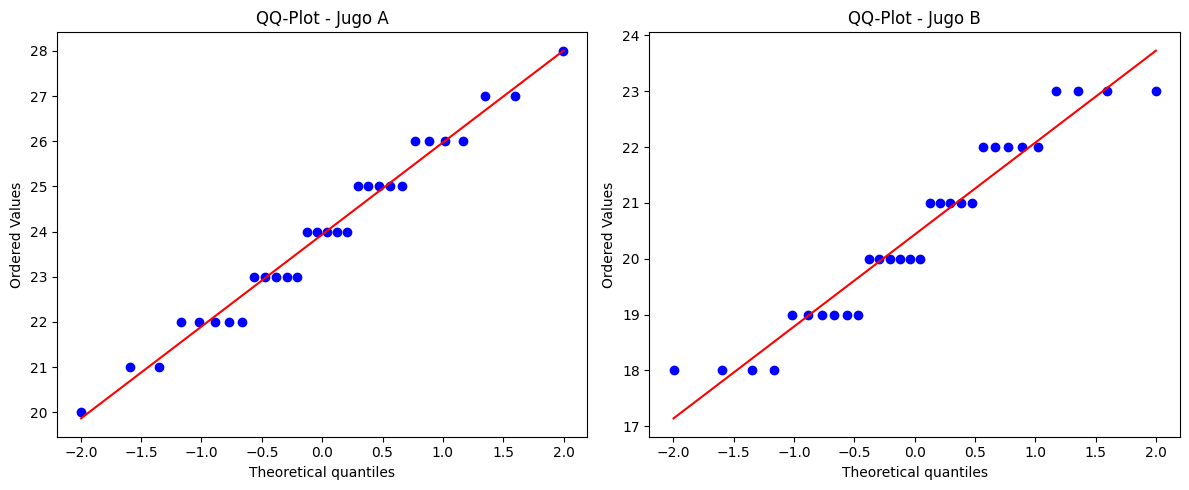

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(df["tipo_de_jugo_A"], dist="norm", plot=plt)
plt.title("QQ-Plot - Jugo A")
plt.subplot(1, 2, 2)
stats.probplot(df["tipo_de_jugo_B"], dist="norm", plot=plt)
plt.title("QQ-Plot - Jugo B")
plt.tight_layout()
plt.show()

### Test Kolmogorov

Jugo A

In [ ]:
media = df_standarizado["tipo_de_jugo_A"].mean()
df_std_A = df_standarizado["tipo_de_jugo_A"].std()
ks_test_A = stats.kstest(df_standarizado["tipo_de_jugo_A"], "norm")

In [ ]:
ks_test_A

KstestResult(statistic=0.11451938044354537, pvalue=0.7847561982514, statistic_location=-0.4710179651534195, statistic_sign=1)

Jugo B

In [ ]:
media = df_standarizado["tipo_de_jugo_B"].mean()
df_std_B = df_standarizado["tipo_de_jugo_B"].std()
ks_test_B = stats.kstest(df_standarizado["tipo_de_jugo_B"], "norm")

In [ ]:
ks_test_B

KstestResult(statistic=0.14323791303933453, pvalue=0.5231390691550495, statistic_location=-0.8775447188558786, statistic_sign=1)

### Calculo de intervalo de confianza

In [ ]:
nivel_confianza = 0.99
grados_libertad_A = len(tipo_de_jugo_A) - 1
grados_libertad_B = len(tipo_de_jugo_B) - 1

In [ ]:
conf_int_A = stats.t.interval(nivel_confianza, grados_libertad_A, loc=np.mean(tipo_de_jugo_A), scale=stats.sem(tipo_de_jugo_A))
conf_int_B = stats.t.interval(nivel_confianza, grados_libertad_B, loc=np.mean(tipo_de_jugo_B), scale=stats.sem(tipo_de_jugo_B))

**Resultado del jugo tipo A:**

In [ ]:
conf_int_A

(22.936141535685323, 24.930525130981344)

**Resultado del jugo tipo B:**

In [ ]:
conf_int_B

(19.611360740938043, 21.255305925728624)